## Client: Social media & content creation

## Objective: to identify the top 5 categories with the largest popularity.
###### Note: popularity is quantified by the “Score” given to each reaction type

# <mark> Data Wrangling<mark>

#### Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

#### Load datasets

In [21]:
content = pd.read_csv('../Forage - Accenture NA - Data Analytics & Viz/datasets_raw/Content.csv')
reactions = pd.read_csv('../Forage - Accenture NA - Data Analytics & Viz/datasets_raw/Reactions.csv')
reaction_types = pd.read_csv('../Forage - Accenture NA - Data Analytics & Viz/datasets_raw/ReactionTypes.csv')

#### Checking of data

In [22]:
content.head(10)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
5,5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,cooking,NaN
6,6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs,https://socialbuzz.cdn.com/content/storage/3f8...
7,7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology,https://socialbuzz.cdn.com/content/storage/e54...
8,8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer,https://socialbuzz.cdn.com/content/storage/0be...
9,9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...


In [23]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [24]:
content.nunique(), reactions.nunique() 

(Unnamed: 0    1000
 Content ID    1000
 User ID        446
 Type             4
 Category        41
 URL            801
 dtype: int64,
 Unnamed: 0    25553
 Content ID      980
 User ID         500
 Type             16
 Datetime      25542
 dtype: int64)

In [25]:
df1 = content  # Your DataFrame
df2 = reactions  # Another DataFrame
df3 = reaction_types

print(f"Unique values in df1:\n{globals()['df1'].nunique()}\n{'-' * 20}")

print(f"Unique values in df2:\n{globals()['df2'].nunique()}")


Unique values in df1:
Unnamed: 0    1000
Content ID    1000
User ID        446
Type             4
Category        41
URL            801
dtype: int64
--------------------
Unique values in df2:
Unnamed: 0    25553
Content ID      980
User ID         500
Type             16
Datetime      25542
dtype: int64


In [26]:
content.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [27]:
Category = sorted(content['Category'].unique())

#can check other columns too
# as can be seen, 'Category' some words have extra "", and the first letter of certain words is capitalized
# unique vales of 'Category' is counted more than it should have been

In [28]:
reactions.head(10)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
6,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,7918d465-0953-4f20-9e28-539e74c82e2f,peeking,2020-12-07 06:27:54
7,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,fa3e42f0-71d8-455f-b024-e52d5c27a145,cherish,2021-04-11 17:35:49
8,8,97522e57-d9ab-4bd6-97bf-c24d952602d2,b0c22f82-b882-4394-bf27-6dfadf26e5c2,hate,2021-01-27 08:32:09
9,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,1932a904-86ba-4438-bb52-b7e6516a4019,peeking,2021-04-01 22:54:23


In [29]:
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


#### Cleaning of data: Drop 'NA', and rename columns. tidy up values

In [30]:
# 1. Identify columns related to the business problem.
# 2. Finding NA and take action (to fill or drop)
# 3. Checking for duplicates/uniques
# 4. Renaming columns
# 5. Check values if any misc error

In [31]:
# 'save' original copy
content_ori = content.copy()
reactions_ori = reactions.copy()
reaction_types_ori = reaction_types.copy()

In [32]:
# Dropping columns
content.drop(['Unnamed: 0','URL'], axis=1, inplace=True)
reactions.drop(['Unnamed: 0','User ID'],axis=1, inplace=True)
reaction_types.drop('Unnamed: 0',axis=1, inplace=True)

In [33]:
# Drop null values
# drop XXX no. of rows in 'reactions'
reactions['Type'].value_counts(dropna=False)
reactions['Type'].value_counts(dropna=True)
reactions.dropna(subset = ['Type'], inplace=True)

In [34]:
reactions.isna().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

In [35]:
# Cleaning data

content['Category'] = content['Category'].str.lower()
content['Category'] = content['Category'].str.strip(' "" ')

In [36]:
# recheck

sorted(content['Category'].unique())

['animals',
 'cooking',
 'culture',
 'dogs',
 'education',
 'fitness',
 'food',
 'healthy eating',
 'public speaking',
 'science',
 'soccer',
 'studying',
 'technology',
 'tennis',
 'travel',
 'veganism']

In [37]:
# replace whitespace with underscore '_'
content.columns = content.columns.str.replace(' ', "_")
reactions.columns = reactions.columns.str.replace(' ', "_")

# lower case of values in columns
content.columns = content.columns.str.lower() 
reactions.columns = reactions.columns.str.lower()
reaction_types.columns = reaction_types.columns.str.lower()

# renaming columns {'original_name' : 'new_name'}
content.rename(columns={'type':'content_type', 'user_id':'poster_id'}, inplace=True)
reactions.rename(columns={'type':'reaction_type'}, inplace=True)
reaction_types.rename(columns={'type':'reaction_type'}, inplace=True)

In [38]:
#recheck df
#content
reactions
#reaction_types

,content_id,reaction_type,datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


#### Merge df

In [39]:
merged_df = pd.merge(reactions, content, how = 'left', on = 'content_id')
merged_df = pd.merge(merged_df, reaction_types, how = 'left', on = 'reaction_type')

In [40]:
merged_df

,content_id,reaction_type,datetime,poster_id,content_type,category,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30
...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,12


#### Export cleaned df

In [41]:
merged_df.to_csv('cleaned_data.csv', index=False)

In [42]:
merged_df

,content_id,reaction_type,datetime,poster_id,content_type,category,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30
...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,12


In [43]:
merged_df_ori = merged_df.copy()

> #### for quick check

In [44]:
import warnings
warnings.filterwarnings("ignore")

def check_dataframe(df):
    """
    Quick check of a DataFrame for null and unique values
    
    Args:
    - df: pandas DataFrame
    
    Returns:
    - summary: pandas DataFrame containing the column names, count of null values,
               percentage of null values, and number of unique values for each column
               in the input DataFrame.
    """
    
    total_rows = len(df)
    summary = pd.DataFrame(columns=['Column', 'Null Count', 'Null Percentage', 'Unique Count'])
    
    for column in df.columns:
        null_count = df[column].isnull().sum()
        null_percentage = (null_count / total_rows) * 100
        unique_count = df[column].nunique()
        summary = summary.append({'Column': column, 'Null Count': null_count,
                                  'Null Percentage': null_percentage,
                                  'Unique Count': unique_count}, ignore_index=True)
    
    
    return summary

def summary_df(df):
    "print(summary_df)"

In [45]:
check_dataframe(merged_df)

,Column,Null Count,Null Percentage,Unique Count
0,content_id,0,0.0,962
1,reaction_type,0,0.0,16
2,datetime,0,0.0,24562
3,poster_id,0,0.0,438
4,content_type,0,0.0,4
5,category,0,0.0,16
6,sentiment,0,0.0,3
7,score,0,0.0,15


__________
__________

# <mark> Data Analysis <mark> <a id='another_cell'></a>

In [46]:
merged_df.head()

,content_id,reaction_type,datetime,poster_id,content_type,category,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30


In [47]:
sorted = merged_df.groupby('category')['score'].sum().sort_values(ascending=False)
top5_category = sorted.head(5).to_frame().reset_index()   #to reset the index and make 'category' a column in the DataFrame 
top5_category

,category,score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [48]:
# set style and color 
sns.set_theme(style="white", context="notebook", palette='bright')
#sns.set()
#sns.color_palette()
#sns.set_theme()

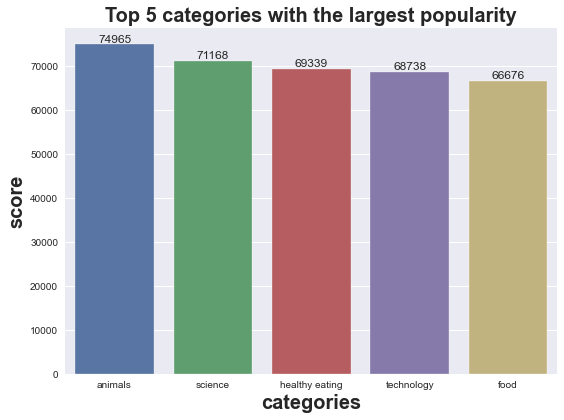

In [187]:
f, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot(data=top5_category, x='category', y='score')

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title("Top 5 categories with the largest popularity", fontweight ="bold", fontsize ='20')
ax.set_xlabel('categories', fontweight ="bold", fontsize ='20')
ax.set_ylabel('score', fontweight ="bold", fontsize ='20')

plt.tight_layout()
plt.show()

___

## Additional Questions

In [50]:
# Question 1: what are the distribution of content types?
# Question 2: Popularity (highest score) of content category by different days
# Question 3: what specific time of the day a specific category might be trending?

In [51]:
merged_df.head()

,content_id,reaction_type,datetime,poster_id,content_type,category,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30


In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content_id     24573 non-null  object
 1   reaction_type  24573 non-null  object
 2   datetime       24573 non-null  object
 3   poster_id      24573 non-null  object
 4   content_type   24573 non-null  object
 5   category       24573 non-null  object
 6   sentiment      24573 non-null  object
 7   score          24573 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.7+ MB


In [53]:
# convert datetime from object to datetime format
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

merged_df['year'] = merged_df['datetime'].dt.year
merged_df["month"] = merged_df["datetime"].dt.month_name()
merged_df["day"] = merged_df["datetime"].dt.day_name()
merged_df['hours'] = merged_df['datetime'].dt.hour


In [54]:
merged_df

,content_id,reaction_type,datetime,poster_id,content_type,category,sentiment,score,year,month,day,hours
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2020,November,Saturday,9
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10,2021,June,Thursday,12
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15,2021,April,Sunday,5
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2021,January,Wednesday,19
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30,2020,August,Sunday,12
...,...,...,...,...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,10,2020,June,Saturday,9
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,45,2021,February,Tuesday,17
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,30,2020,September,Saturday,3
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,12,2020,November,Wednesday,20


## Question 1: what are the distribution of content types?

In [110]:
merged_df

,content_id,reaction_type,datetime,poster_id,content_type,category,sentiment,score,year,month,day,hours,time
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2020,November,Saturday,9,AM
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10,2021,June,Thursday,12,AM
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15,2021,April,Sunday,5,AM
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2021,January,Wednesday,19,PM
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30,2020,August,Sunday,12,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,10,2020,June,Saturday,9,AM
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,45,2021,February,Tuesday,17,PM
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,30,2020,September,Saturday,3,AM
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,12,2020,November,Wednesday,20,PM


In [123]:
df = merged_df.groupby('content_type')['category'].count()
df.tolist()

[6079, 5660, 6589, 6245]

In [122]:
data_content_type = df.index.tolist()
data_content_type

['GIF', 'audio', 'photo', 'video']

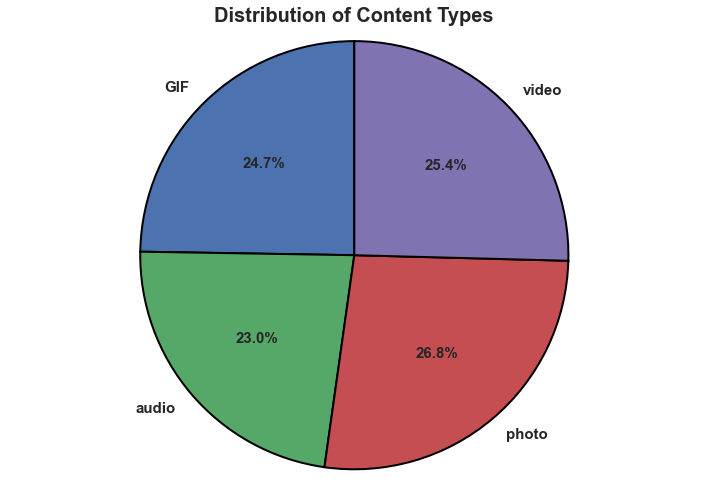

In [161]:
from matplotlib import pyplot as plt
import numpy as np

data_content_type = ['GIF', 'audio', 'photo', 'video']
data = df.tolist()
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(data, labels = data_content_type, startangle = 90, autopct='%1.1f%%', 
        textprops={'fontsize': 15, 'weight': 'bold'}, center = (0, 0),
        wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})

ax.set_title('Distribution of Content Types', fontweight ="bold", fontsize ='20')

plt.axis('equal')
plt.tight_layout()
plt.show()


## Question 2: Popularity (highest score) of content category by different days

In [55]:
df = merged_df.groupby(['content_type','category','day'])['score'].sum()
data = df.unstack()
data

day                      Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
content_type category                                                          
GIF          animals       2391    2001      1716    1540      1715     2255   
             cooking       4121    2485      2579    2882      3004     2533   
             culture       2638    2706      2411    2846      3393     2694   
             dogs          1299     961      1322     869       771     1531   
             education      998    1108      1216    1095      1527      929   
...                         ...     ...       ...     ...       ...      ...   
video        studying      1478    1207      1083    1463      1394     1346   
             technology    1532    1273       952     951      1819     1201   
             tennis        1347    1545      1900    2123      1826     1663   
             travel        2666    3110      2535    2737      2906     2733   
             veganism       958     867       877     855       555     1370   

day                      Wednesday  
content_type category               
GIF          animals          1334  
             cooking          2817  
             culture          2928  
             dogs             1189  
             education         871  
...                            ...  
video        studying         1165  
             technology       1623  
             tennis           1324  
             travel           3304  
             veganism         1034  

[64 rows x 7 columns]

In [116]:
df = merged_df.groupby(['category','day'])['score'].sum()
data = df.unstack()
data

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
category,,,,,,,
animals,11909,10746,10172,11858,10755,10120,9405
cooking,11074,8779,8895,8426,9484,8971,9127
culture,9722,9634,9489,8379,10833,10019,8503
dogs,6751,8239,8598,7177,6945,7511,7290
education,7909,8210,7746,9214,9315,7209,7833
fitness,6820,7836,7663,8568,8857,7914,7665
food,9115,9986,8321,9892,10531,9223,9608
healthy eating,10390,8743,9825,10414,10182,9313,10472
public speaking,6980,8002,6830,6611,6121,7318,7402


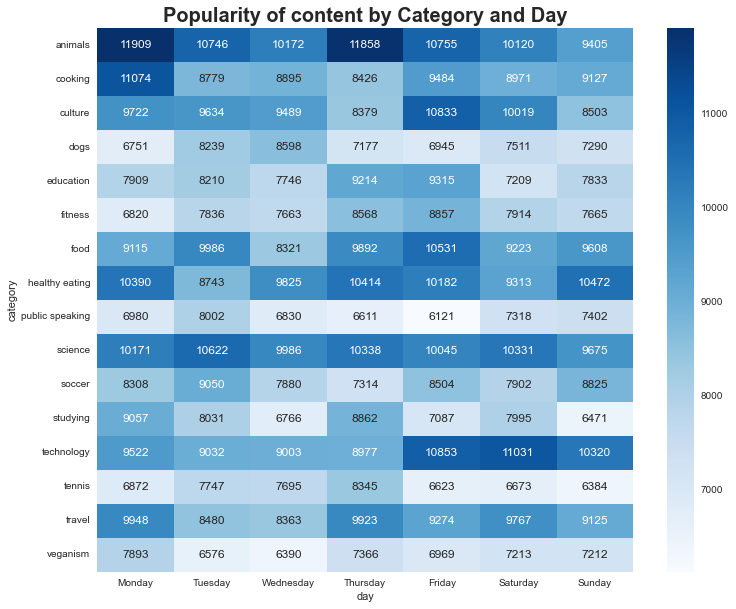

In [121]:
#sum of scores by category and day
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(data, annot=True, cmap="Blues", fmt="d",square=False,
               xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_title('Popularity of content by Category and Day', fontweight ="bold", fontsize ='20')
plt.show()

## Question 3: what specific time of the day a specific category might be trending?

In [162]:
merged_df.head()

,content_id,reaction_type,datetime,poster_id,content_type,category,sentiment,score,year,month,day,hours,time
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2020,November,Saturday,9,AM
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10,2021,June,Thursday,12,AM
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15,2021,April,Sunday,5,AM
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2021,January,Wednesday,19,PM
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30,2020,August,Sunday,12,AM


In [78]:
merged_df[['hours']]

,hours
0,9
1,12
2,5
3,19
4,12
...,...
24568,9
24569,17
24570,3
24571,20


In [80]:
merged_df['time'] = np.where(merged_df['hours'] <= 12, 'AM', 'PM')

In [82]:
merged_df.head()

,content_id,reaction_type,datetime,poster_id,content_type,category,sentiment,score,year,month,day,hours,time
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2020,November,Saturday,9,AM
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10,2021,June,Thursday,12,AM
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15,2021,April,Sunday,5,AM
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2021,January,Wednesday,19,PM
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30,2020,August,Sunday,12,AM


In [67]:
df = merged_df.groupby(['category','time'])['score'].sum()
data = df.unstack()
data

time,AM,PM
category,,
animals,40766,34199
cooking,34681,30075
culture,35529,31050
dogs,28049,24462
education,30217,27219
fitness,29778,25545
food,37193,29483
healthy eating,36911,32428
public speaking,27104,22160


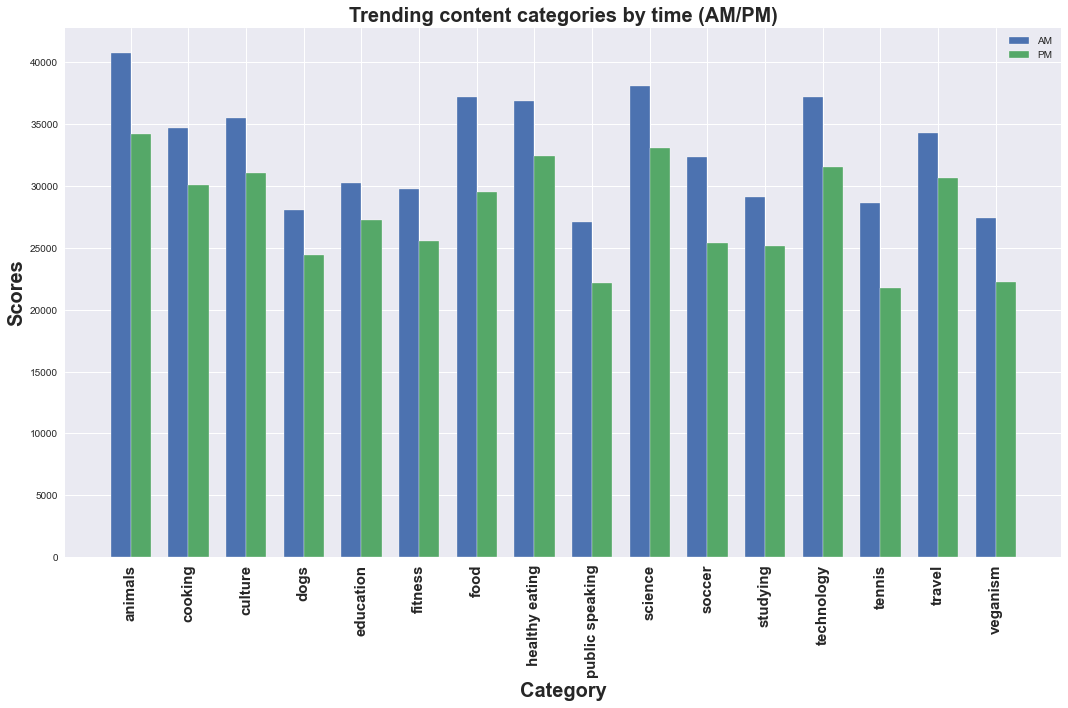

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = ['animals', 'cooking', 'culture', 'dogs', 'education', 'fitness', 'food', 'healthy eating',
              'public speaking', 'science', 'soccer', 'studying', 'technology', 'tennis', 'travel', 'veganism']
time_data = [[40766, 34199],
             [34681, 30075],
             [35529, 31050],
             [28049, 24462],
             [30217, 27219],
             [29778, 25545],
             [37193, 29483],
             [36911, 32428],
             [27104, 22160],
             [38119, 33049],
             [32375, 25408],
             [29128, 25141],
             [37201, 31537],
             [28608, 21731],
             [34252, 30628],
             [27396, 22223]]

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
width = 0.35
ind = np.arange(len(categories))

# Plotting the bars side by side
bar1 = ax.bar(ind, [data[0] for data in time_data], width, label='AM')
bar2 = ax.bar(ind + width, [data[1] for data in time_data], width, label='PM')

# labels and title
ax.set_title('Trending content categories by time (AM/PM)', fontweight ="bold", fontsize ='20')

ax.set_xlabel('Category', fontweight ="bold", fontsize ='20')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(categories, rotation=90, fontweight ="bold", fontsize ='15')

ax.set_ylabel('Scores', fontweight ="bold", fontsize ='20')


ax.legend()

plt.tight_layout()
plt.show()

